In [1]:
!pip install pandas
!pip install rdkit
!pip install git+https://github.com/mcs07/PubChemPy.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 51.7 MB/s eta 0:00:00
  Cloning https://github.com/mcs07/PubChemPy.git to /tmp/pip-req-build-s28tz2u2
  Running command git clone --filter=blob:none --quiet https://github.com/mcs07/PubChemPy.git /tmp/pip-req-build-s28tz2u2
  Resolved https://github.com/mcs07/PubChemPy.git to commit a5d86463dab32dd3589479cf9b9737e26651dd7d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PubChemPy: filename=pubchempy-1.0.4-py3-none-any.whl size=21354 sha256=c5481bade5c131ca024a3c03a87e71423d9f0c4dfee502997725ad418a54d898
  Stored in directory: /tmp/pip-ephem-wheel-cache-7fuy0em7/wheels/ef/9c/d9/4fc18c3c8e318d83a3f6db4d4446460439839bf2848de2985a
Successfully built PubChemPy


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import MolFromSmiles, rdFMCS, Draw, MolFromSmarts, MolToSmiles
import pubchempy as pcp

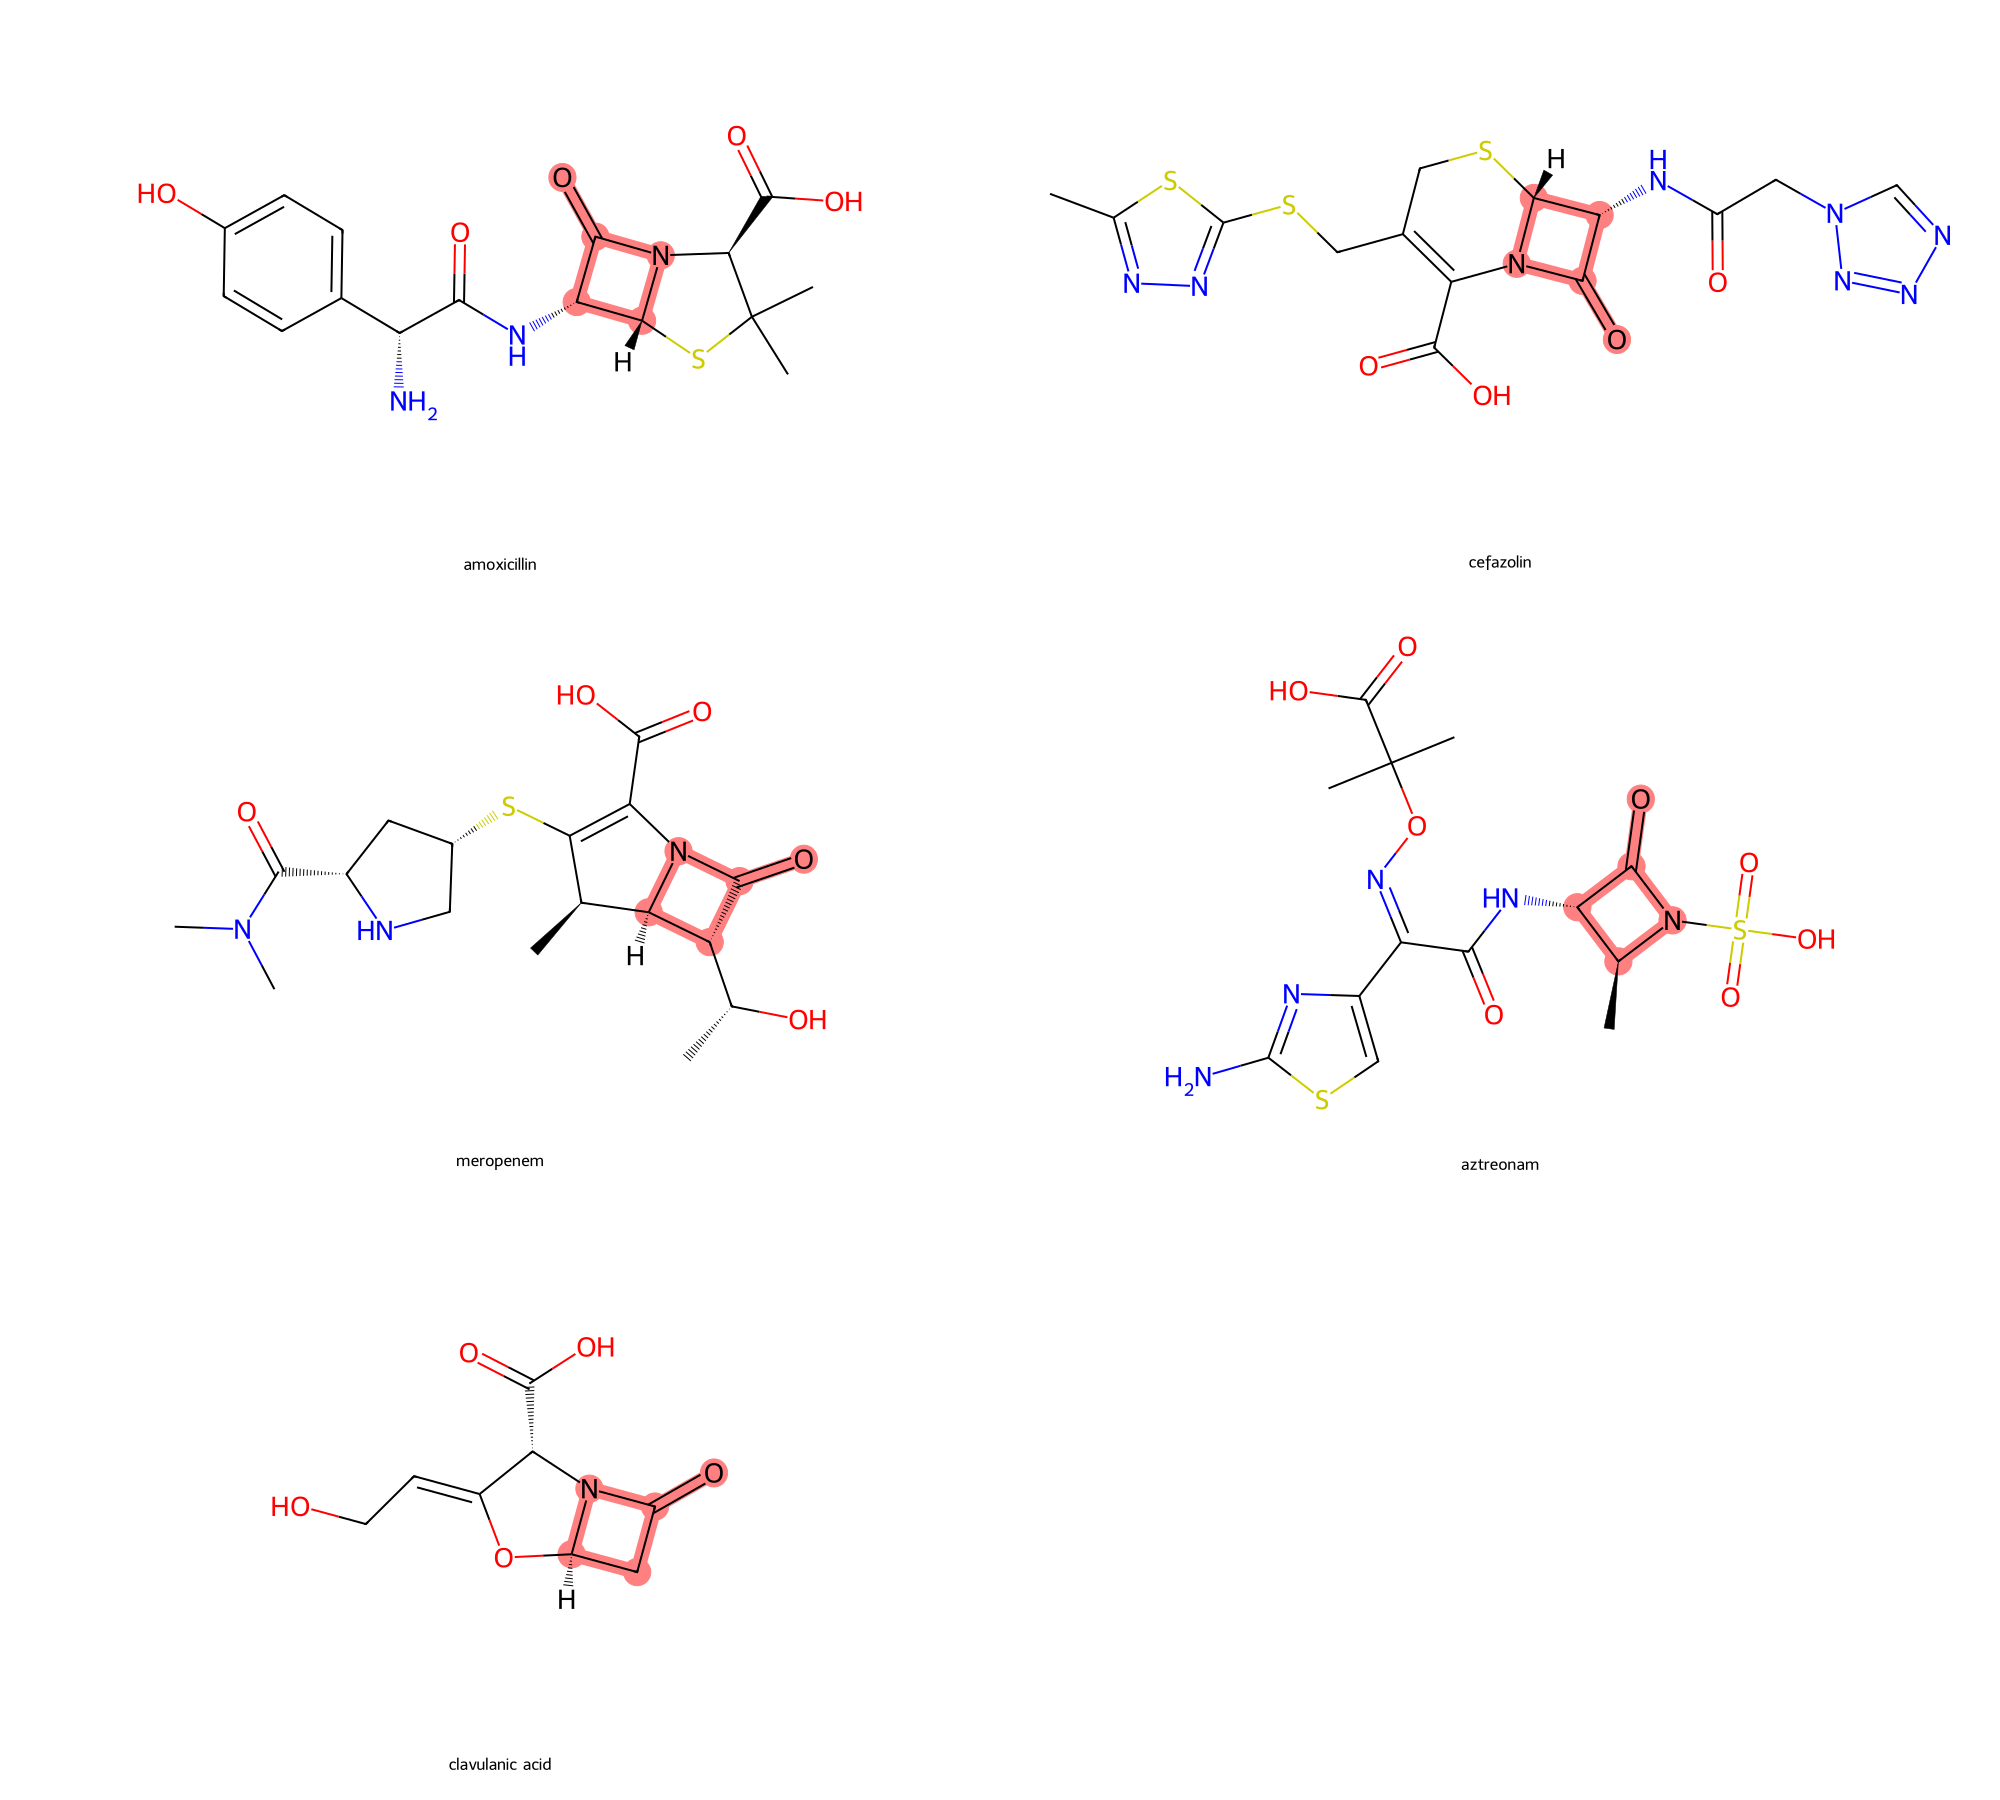

In [3]:
data_smiles = pd.read_csv('https://raw.githubusercontent.com/sharonlae77/useful_codes/main/data/data_smiles.csv')

molecule = [MolFromSmiles(i) for i in data_smiles['smiles']]

res = rdFMCS.FindMCS(molecule,
                     completeRingsOnly=True
                    )

substructure_smarts = res.smartsString

to_highlight = []

for mol in molecule:
  substructure = Chem.MolFromSmarts(substructure_smarts)
  if mol and substructure:
    match = mol.GetSubstructMatch(substructure)
    if match:
      to_highlight.append(match)
    else:
      to_highlight.append([])
  else:
    to_highlight.append([])

legends = []
for i in range(len(data_smiles)):
    legend = data_smiles['name'].iloc[i]
    legends.append(legend)

opts = Draw.MolDrawOptions()
img = MolsToGridImage(molecule,
											molsPerRow=2,
											subImgSize=(1000, 600),
											legends=legends,
											returnPNG=True,
                      drawOptions=opts,
                      highlightAtomLists=to_highlight)
img

In [4]:
substructure_smiles = MolToSmiles(MolFromSmarts(substructure_smarts))
compounds = pcp.get_compounds(substructure_smiles, namespace='smiles')
if compounds:
    match = compounds[0]
    print(match.iupac_name)
else:
    print("Compound not found.")

azetidin-2-one
